In [ ]:
The purpose of this project is to analyse the employee data provided and build a predictive model that answers the question:
- Which staff are eligible for promotion?

## 1. Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Algorithms
from sklearn.preprocessing import StandardScaler


## 2. Reading The Data

In [2]:
train = pd.read_csv('train.csv') #load train dataset

train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [ ]:
The Target Variable for this project will be - 'Promoted_or_Not'

## 2.1. An Overview of the Data

In [506]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [ ]:
#There's a total of 38,312 records and 19 features in the train dataframe.
#Below is a list of the features with a short description

In [ ]:
"""
• EmployeeNo : System-generated unique staff ID

• Division: Operational department where each employee works

• Qualification: Highest qualification received by the staff

• Gender: Male or Female

• Channel_of_Recruitment: How the staff was recruited – this is via internal process, use of an agent or special referral

• Trainings_Attended : Unique paid and unpaid trainings attended by each staff in the previous business cycle

• Year_of_birth: Year that the employee was born

• Last_Performance_Score Previous year overall performance HR score and rated on a scale of 0-14

• Year_of_recruitment : The year that each staff was recruited into the company

• Targets_met: A measure of employees who meet the annual set target. If met, the staff scores 1 but if not, it is a 0.

• Previous_Award : An indicator of previous award won. If yes, it is a 1 and if No it is a 0.

• Training_score_average: Feedback score on training attended based on evaluation

• State_Of_Origin: The state that the employee claims

• Foreign_schooled: An indicator of staff who had any of their post-secondary education outside the country. 
  Responses are in Yes or No

• Marital_Status: Marriage status of employees and recorded as Yes or No

• Past_Disciplinary_Action : An indicator if a staff has been summoned to a disciplinary panel in the past. 
  This is indicated as Yes or No

• Previous_IntraDepartmental_Movement : This is an indicator to identify staff who have moved between departments in the past. 
  Yes and No are the responses.

• No_of_previous_employers : A list of the number of companies that an employee worked with before joining the organisation. 
  This is recorded as counts
"""

In [507]:
train.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [508]:
#Train Dataset Missing Values
total = train.isnull().sum().sort_values(ascending=False)
pc1 = train.isnull().sum()/train.isnull().count()*100
pc2 = (round(pc1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, pc2], axis=1, keys=['Total', '%'])
missing_data.head()


,Total,%
Qualification,1679,4.4
Promoted_or_Not,0,0.0
Year_of_recruitment,0,0.0
Division,0,0.0
Gender,0,0.0


(3241, 19) (35071, 19)


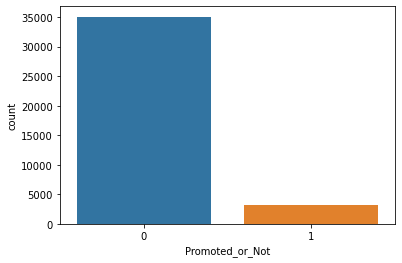

In [509]:
sns.countplot(x='Promoted_or_Not',data=train)
promoted= train[train['Promoted_or_Not']==1]
not_promoted= train[train['Promoted_or_Not']==0]
print(promoted.shape,not_promoted.shape)

#### Observations

In [ ]:
""""
From the tables above, we can note a few things: 

. First of all, that we need to convert categorical data into numeric data to allow for a smooth machine learning process. 

. Furthermore, we can see that some of the given variables have widely different ranges.
  To avoid misleading or erroneous results, we would need to scale our variables.
  
. Qualification feature in our train dataset would need to be addressed as it has 4.4% of its records missing. 
  Some data preprocessing will be required here
  
. From this description, we can see that just over 8 percent of staff had been promoted. This is a problem because it means that the dataset is imbalanced
To solve this problem, resampling will be done to balance things out

In [ ]:
#Question: What variables could contribute to a staff being promoted or not?
# To answer this question, we could visualize our dataset

In [510]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


## 2.2. Visualize Relationships

### 1. Promotion by Qualification & Gender

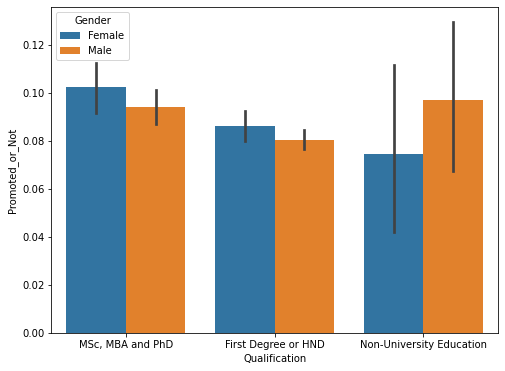

In [511]:
plt.figure(figsize=(8,6))
sns.barplot(x='Qualification',y='Promoted_or_Not',data = train,hue='Gender',dodge=True)

In [ ]:
#From this visualization,we can see that on average, females with Graduate degrees and Undergraduate degrees were promoted more often than the males

### 2. Promotion by Division

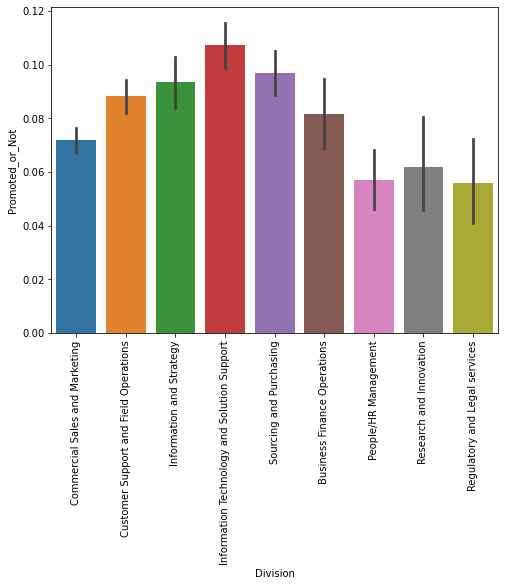

In [512]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(x='Division',y='Promoted_or_Not',data=train)

In [ ]:
#This visualization shows the department where promotions have most occured

### 3. Promotion by Targets Met and Qualification

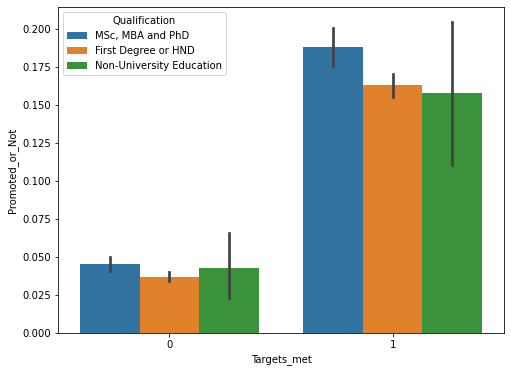

In [513]:
plt.figure(figsize=(8,6))
sns.barplot(x='Targets_met',y='Promoted_or_Not',data=train,hue='Qualification',dodge=True)

In [ ]:
#This particular visualization shows that meeting set targets is a major criteria for deciding on whether to promote on not.

## 3. Data Preprocessing

In [514]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
#We will use the mode of all values in the Qualification feature to fill missing values because it is a categorical variable
train['Qualification'] = train['Qualification'].fillna(train['Qualification'].mode()[0])

In [516]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        38312 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [4]:
#Create Age column in train dataset
current_year = 2020
yob = train['Year_of_birth']
train['Age']= np.subtract(current_year,yob)

#### Set_Index

In [5]:
train.reset_index(drop=True,inplace= True) #Reset train dataframe Index
train.set_index('EmployeeNo',inplace=True)#Set train dataframe index

#### Convert Categorical Variables to Numerical

In [6]:
#Division
division_dummies_train = pd.get_dummies(train.Division, prefix='Division')
train = pd.concat([train, division_dummies_train], axis=1)

#Qualification
qualification_dummies_train = pd.get_dummies(train.Qualification, prefix='Qualification')
train = pd.concat([train, qualification_dummies_train], axis=1)

#Gender
train['Gender'].replace('Female', 0, inplace=True)
train['Gender'].replace('Male', 1, inplace=True)

In [7]:
#Drop Redundant Fields
train = train.drop(['Year_of_recruitment','Qualification','Channel_of_Recruitment','Past_Disciplinary_Action','Foreign_schooled','Division','Year_of_birth' ,'State_Of_Origin', 'Marital_Status','Previous_IntraDepartmental_Movement','No_of_previous_employers'], axis=1)

## 4. Scale Variables

In [8]:
#Scale 'Last_performance_score'
lps_train=train['Last_performance_score'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
lps_train_scaled = scaler.fit_transform(lps_train)
train['Last_performance_score'] = lps_train_scaled

#Scale 'Training_score_average'
tsa_train=train['Training_score_average'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
tsa_train_scaled = scaler.fit_transform(tsa_train)
train['Training_score_average'] = tsa_train_scaled

#Scale 'Age'
age_train=train['Age'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
age_train_scaled = scaler.fit_transform(age_train)
train['Age'] = age_train_scaled

## 5. Heat Map

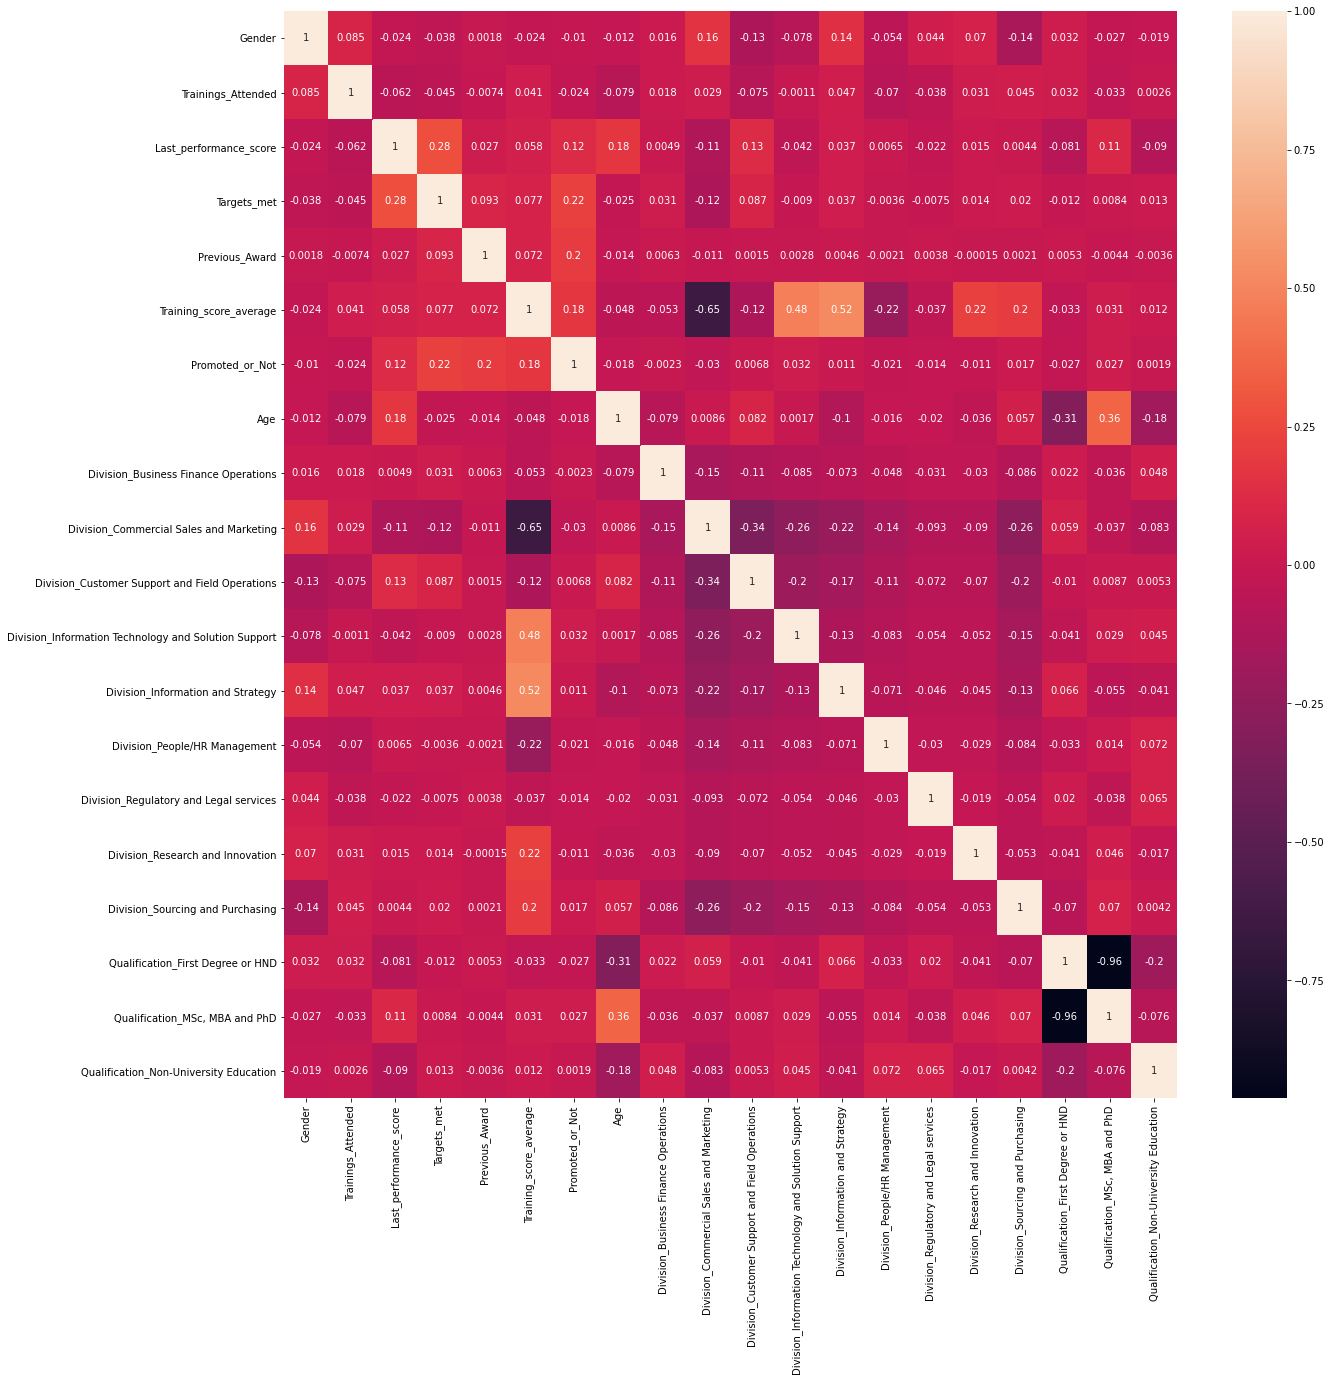

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

## 6. Balancing Dataset using Oversampling(SMOTE Algorithm)

In [10]:
#Dependent and Independent variables
X = train.drop(['Promoted_or_Not'],axis=1) #Returns all columns in the dataset except Promoted_or_Not
y = train['Promoted_or_Not'] #Returns just the Promoted_or_Not column

In [11]:
#X_train and y_train Oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 3241
Before OverSampling, counts of label '0': 35071 

After OverSampling, the shape of X: (70142, 19)
After OverSampling, the shape of y: (70142,) 

After OverSampling, counts of label '1': 35071
After OverSampling, counts of label '0': 35071


## 7. Split Data into Train & Test

In [13]:
#Split Data into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=100)

In [14]:
#Train and Test shape(70% train, 30% test)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (49099, 19)
Number transactions y_train dataset:  (49099,)
Number transactions X_test dataset:  (21043, 19)
Number transactions y_test dataset:  (21043,)


### 7.1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
#Instatiate Model
lr = LogisticRegression(solver='liblinear')

In [16]:
#Train algorithm with the dataset
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
#Make predictions with model
y_pred = lr.predict(X_test)

In [18]:
#Check if model predicted well
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#Produced accuracy score of 79.1%

0.7914270778881338


### 7.2. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Model
decision_tree = DecisionTreeClassifier()

In [20]:
#Train algorithm with the dataset
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
#Make prediction with model
y_pred = decision_tree.predict(X_test)

In [22]:
#Check if model predicted well
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#Produced accuracy score of 93.3%

0.9325666492420283


### 7.3. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
#Instantiate model
random_forest = RandomForestClassifier(n_estimators=100)

In [24]:
#Train algorithm with the dataset
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
#Make prediction with model
y_pred = random_forest.predict(X_test)

In [26]:
#Check if model predicted well
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#Produced accuracy score of 93.7%

0.9365109537613459


## 8. Classification Report & Confusion Matrix

In [27]:
#Import Algorithm
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10432
           1       0.94      0.94      0.94     10611

    accuracy                           0.94     21043
   macro avg       0.94      0.94      0.94     21043
weighted avg       0.94      0.94      0.94     21043



In [717]:
#Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[9742  690]
 [ 659 9952]]


In [ ]:
# [TP - 9742   FN-690]   
# [FP - 659    TN-9952] 

#F1 Score - 2*(Recall*Precision)/(Recall + Precision)
2*(0.94 * 0.94)/(0.94 + 0.94) = 2 * 0.8836/1.88 = 94%
